# Программирование на Python.  
## Домашнее задание 11

Проанализировать два типа логов изпредставленного набора данных,
найти подозрительные события и визуализировать 10 наиболее
распространённых подозрительных событий.  
Этап 1. Загрузка и подготовка данных
Скачайте или используйте предоставленный набор данных botsv1,
содержащий логи WinEventLog и DNS.
Загрузите данные в датафреймы с помощью Pandas.
При необходимости выполните нормализацию данных: приведение
к единому формату, очистку.  
Этап 2. Анализ данных
Проанализируйте два типа логов:
- для WinEventLog найдите подозрительные события по полю EventID,
например, входы с ошибками, эскалация привилегий и прочие;
- для DNS-логов определите потенциально вредоносные
или подозрительные запросы, например, частые обращения
к редким доменам, нестандартные поддомены.
 
Этап 3. Визуализация данных  
Составьте график топ-10 подозрительных событий.
Можно построить отдельные диаграммы для WinEventLog и DNS-логов
или объединённую визуализацию.
Используйте Seaborn или Matplotlib для создания графиков.

In [1]:
from pandas import json_normalize
import pandas as pd
import json
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
'''Загрузка данных.'''
file = 'botsv1.json'
security_logs = pd.read_json(file)
print(security_logs.head())

   preview  offset                                             result
0    False   41160  {'Account_Domain': 'WAYNECORPINC', 'Account_Na...
1    False   41161  {'Account_Domain': 'WAYNECORPINC', 'Account_Na...
2    False   41162  {'Account_Domain': ['-', 'WAYNECORPINC'], 'Acc...
3    False   41163  {'Account_Domain': ['WAYNECORPINC', 'WAYNECORP...
4    False   41164  {'Account_Domain': ['WAYNECORPINC', 'WAYNECORP...


In [6]:
data = []

for idx, row in security_logs.iterrows():
    if isinstance(row['result'], dict):
        data.append(row['result'])

In [10]:
security_logs.loc[1].result

{'Account_Domain': 'WAYNECORPINC',
 'Account_Name': 'we1159srv$',
 'ComputerName': 'we1159srv.waynecorpinc.local',
 'EventCode': '4689',
 'EventType': '0',
 'Exit_Status': '0x1',
 'Keywords': 'Audit Success',
 'LogName': 'Security',
 'Logon_ID': '0x3E7',
 'Message': 'A process has exited.\n\nSubject:\n\tSecurity ID:\t\tNT AUTHORITY\\SYSTEM\n\tAccount Name:\t\twe1159srv$\n\tAccount Domain:\t\tWAYNECORPINC\n\tLogon ID:\t\t0x3E7\n\nProcess Information:\n\tProcess ID:\t0x13cc\n\tProcess Name:\tC:\\Program Files\\SplunkUniversalForwarder\\bin\\splunk-regmon.exe\n\tExit Status:\t0x1',
 'OpCode': 'Info',
 'Process_ID': '0x13cc',
 'Process_Name': 'C:\\Program Files\\SplunkUniversalForwarder\\bin\\splunk-regmon.exe',
 'RecordNumber': '519433',
 'Security_ID': 'NT AUTHORITY\\SYSTEM',
 'SourceName': 'Microsoft Windows security auditing.',
 'TaskCategory': 'Process Termination',
 'Type': 'Information',
 'action': 'success',
 'app': 'win:unknown',
 'body': 'A process has exited.\n\nSubject:\n\tSecu

In [33]:
len(security_logs.loc[1].result)

75

In [11]:
df = pd.DataFrame(data)
print(f"Всего записей: {len(df)}")

Всего записей: 38


In [12]:
df

,Account_Domain,Account_Name,ComputerName,Creator_Process_ID,EventCode,EventType,Keywords,LogName,Logon_ID,Message,...,ReadData__or_ListDirectory_,Resource_Attributes,Restricted_SID_Count,Transaction_ID,privilege_id,vendor_privilege,QueryName,QueryType,ClientIP,ResponseCode
0,WAYNECORPINC,we3436srv$,we3436srv.waynecorpinc.local,0xddc,4688,0,Audit Success,Security,0x3E7,A new process has been created.\n\nSubject:\n\...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WAYNECORPINC,we1159srv$,we1159srv.waynecorpinc.local,NaN,4689,0,Audit Success,Security,0x3E7,A process has exited.\n\nSubject:\n\tSecurity ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[-, WAYNECORPINC]","[-, we9028srv$]",we9028srv.waynecorpinc.local,NaN,4624,0,Audit Success,Security,"[0x0, 0x15D68DA]",An account was successfully logged on.\n\nSubj...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[WAYNECORPINC, WAYNECORPINC]","[we5878srv$, we5878srv$]",we5878srv.waynecorpinc.local,NaN,4703,0,Audit Success,Security,"[0x3E7, 0x3E7]",A user right was adjusted.\n\nSubject:\n\tSecu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[WAYNECORPINC, WAYNECORPINC]","[we3997srv$, we3997srv$]",we3997srv.waynecorpinc.local,NaN,4703,0,Audit Success,Security,"[0x3E7, 0x3E7]",A user right was adjusted.\n\nSubject:\n\tSecu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"[WAYNECORPINC, WAYNECORPINC]","[we9269srv$, we9269srv$]",we9269srv.waynecorpinc.local,NaN,4703,0,Audit Success,Security,"[0x3E7, 0x3E7]",A user right was adjusted.\n\nSubject:\n\tSecu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,WAYNECORPINC,we7127srv$,we7127srv.waynecorpinc.local,NaN,4689,0,Audit Success,Security,0x3E7,A process has exited.\n\nSubject:\n\tSecurity ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,"[WAYNECORPINC, -]","[we5689srv$, -]",we5689srv.waynecorpinc.local,0x1b0,4688,0,Audit Success,Security,"[0x3E7, 0x0]",A new process has been created.\n\nCreator Sub...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,"[WAYNECORPINC, WAYNECORPINC]","[we1662srv$, we1662srv$]",we1662srv.waynecorpinc.local,NaN,4703,0,Audit Success,Security,"[0x3E7, 0x3E7]",A user right was adjusted.\n\nSubject:\n\tSecu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,WAYNECORPINC,we3652srv$,we3652srv.waynecorpinc.local,0xddc,4688,0,Audit Success,Security,0x3E7,A new process has been created.\n\nSubject:\n\...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
win_logs = df[df['sourcetype'].str.contains('WinEventLog', na=False)].copy()
win_logs.head()

,Account_Domain,Account_Name,ComputerName,Creator_Process_ID,EventCode,EventType,Keywords,LogName,Logon_ID,Message,...,ReadData__or_ListDirectory_,Resource_Attributes,Restricted_SID_Count,Transaction_ID,privilege_id,vendor_privilege,QueryName,QueryType,ClientIP,ResponseCode
0,WAYNECORPINC,we3436srv$,we3436srv.waynecorpinc.local,0xddc,4688,0,Audit Success,Security,0x3E7,A new process has been created.\n\nSubject:\n\...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,WAYNECORPINC,we1159srv$,we1159srv.waynecorpinc.local,NaN,4689,0,Audit Success,Security,0x3E7,A process has exited.\n\nSubject:\n\tSecurity ...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"[-, WAYNECORPINC]","[-, we9028srv$]",we9028srv.waynecorpinc.local,NaN,4624,0,Audit Success,Security,"[0x0, 0x15D68DA]",An account was successfully logged on.\n\nSubj...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"[WAYNECORPINC, WAYNECORPINC]","[we5878srv$, we5878srv$]",we5878srv.waynecorpinc.local,NaN,4703,0,Audit Success,Security,"[0x3E7, 0x3E7]",A user right was adjusted.\n\nSubject:\n\tSecu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"[WAYNECORPINC, WAYNECORPINC]","[we3997srv$, we3997srv$]",we3997srv.waynecorpinc.local,NaN,4703,0,Audit Success,Security,"[0x3E7, 0x3E7]",A user right was adjusted.\n\nSubject:\n\tSecu...,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Columns: 115 entries, Account_Domain to ResponseCode
dtypes: object(115)
memory usage: 34.3+ KB


In [45]:
list(df.columns)

['Account_Domain',
 'Account_Name',
 'ComputerName',
 'Creator_Process_ID',
 'EventCode',
 'EventType',
 'Keywords',
 'LogName',
 'Logon_ID',
 'Message',
 'New_Process_ID',
 'New_Process_Name',
 'OpCode',
 'Process_Command_Line',
 'RecordNumber',
 'Security_ID',
 'SourceName',
 'TaskCategory',
 'Token_Elevation_Type',
 'Token_Elevation_Type_id',
 'Type',
 'action',
 'app',
 'body',
 'date_hour',
 'date_mday',
 'date_minute',
 'date_month',
 'date_second',
 'date_wday',
 'date_year',
 'date_zone',
 'dest',
 'dest_nt_domain',
 'dest_nt_host',
 'dvc',
 'dvc_nt_host',
 'event_id',
 'eventtype',
 'host',
 'id',
 'index',
 'linecount',
 'member_dn',
 'member_id',
 'member_nt_domain',
 'name',
 'object',
 'product',
 'punct',
 'session_id',
 'severity',
 'severity_id',
 'signature',
 'signature_id',
 'source',
 'sourcetype',
 'splunk_server',
 'src',
 'src_nt_domain',
 'status',
 'subject',
 'tag',
 'tag::eventtype',
 'timeendpos',
 'timestartpos',
 'user',
 'vendor',
 '_bkt',
 '_cd',
 '_even

In [53]:
df[['QueryName', 'QueryType', 'ClientIP', 'EventCode', 'EventType', 'LogName', 'sourcetype', 'eventtype']]

,QueryName,QueryType,ClientIP,EventCode,EventType,LogName,sourcetype,eventtype
0,NaN,NaN,NaN,4688,0,Security,WinEventLog:Security,"[windows_process_new, wineventlog_security, wi..."
1,NaN,NaN,NaN,4689,0,Security,WinEventLog:Security,"[windows_process_exit, wineventlog_security, w..."
2,NaN,NaN,NaN,4624,0,Security,WinEventLog:Security,"[windows_logon_success, wineventlog_security, ..."
3,NaN,NaN,NaN,4703,0,Security,WinEventLog:Security,"[wineventlog_security, wineventlog_windows, wi..."
4,NaN,NaN,NaN,4703,0,Security,WinEventLog:Security,"[wineventlog_security, wineventlog_windows, wi..."
5,NaN,NaN,NaN,4703,0,Security,WinEventLog:Security,"[wineventlog_security, wineventlog_windows, wi..."
6,NaN,NaN,NaN,4689,0,Security,WinEventLog:Security,"[windows_process_exit, wineventlog_security, w..."
7,NaN,NaN,NaN,4688,0,Security,WinEventLog:Security,"[windows_process_new, wineventlog_security, wi..."
8,NaN,NaN,NaN,4703,0,Security,WinEventLog:Security,"[wineventlog_security, wineventlog_windows, wi..."
9,NaN,NaN,NaN,4688,0,Security,WinEventLog:Security,"[windows_process_new, wineventlog_security, wi..."


In [89]:
win_logs = df.iloc[0:35].copy()  # WinEventLog
dns_logs = df.iloc[35:38].copy()  # DNS логи

In [92]:
win_logs.columns[win_logs.isna().all()].tolist()

[]

In [93]:
dns_logs.columns[dns_logs.isna().all()].tolist()

[]

In [91]:
win_logs = win_logs.dropna(axis=1, how='all')
dns_logs = dns_logs.dropna(axis=1, how='all')

## win_logs

In [111]:
win_logs_stat = win_logs.EventCode.value_counts()
win_logs_stat

EventCode
4703    12
4689    10
4688     9
4624     3
4656     1
Name: count, dtype: int64

In [107]:
rows_4703 = win_logs[win_logs['EventCode'] == '4703']
rows_4703.T.dropna()[:60]

,3,4,5,8,15,17,22,23,25,30,32,33
Account_Domain,"[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]","[WAYNECORPINC, WAYNECORPINC]"
Account_Name,"[we5878srv$, we5878srv$]","[we3997srv$, we3997srv$]","[we9269srv$, we9269srv$]","[we1662srv$, we1662srv$]","[we9390srv$, we9390srv$]","[we9390srv$, we9390srv$]","[we8018srv$, we8018srv$]","[we7075srv$, we7075srv$]","[we4837srv$, we4837srv$]","[we1159srv$, we1159srv$]","[we8670srv$, we8670srv$]","[we7887srv$, we7887srv$]"
ComputerName,we5878srv.waynecorpinc.local,we3997srv.waynecorpinc.local,we9269srv.waynecorpinc.local,we1662srv.waynecorpinc.local,we9390srv.waynecorpinc.local,we9390srv.waynecorpinc.local,we8018srv.waynecorpinc.local,we7075srv.waynecorpinc.local,we4837srv.waynecorpinc.local,we1159srv.waynecorpinc.local,we8670srv.waynecorpinc.local,we7887srv.waynecorpinc.local
EventCode,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703,4703
EventType,0,0,0,0,0,0,0,0,0,0,0,0
Keywords,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success,Audit Success
LogName,Security,Security,Security,Security,Security,Security,Security,Security,Security,Security,Security,Security
Logon_ID,"[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]","[0x3E7, 0x3E7]"
Message,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...,A user right was adjusted.\n\nSubject:\n\tSecu...
OpCode,Info,Info,Info,Info,Info,Info,Info,Info,Info,Info,Info,Info


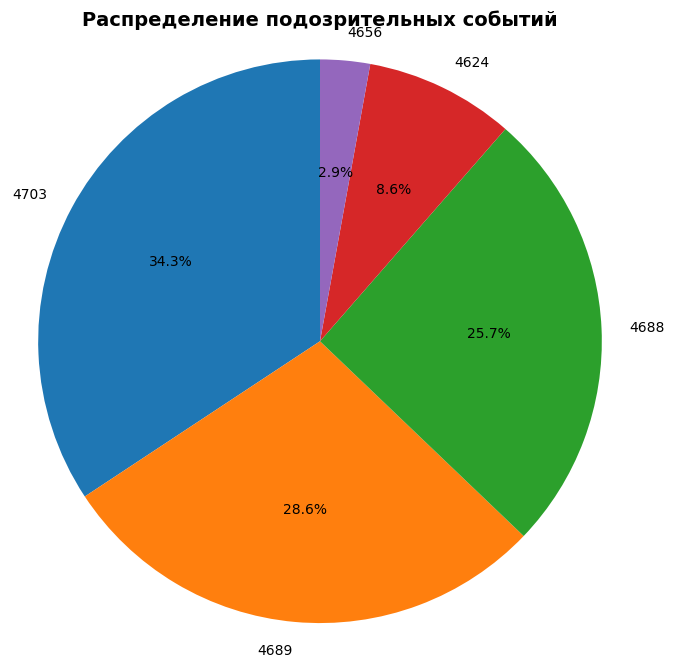

In [112]:
plt.figure(figsize=(8, 8))
plt.pie(win_logs_stat.values, 
        labels=win_logs_stat.index, 
        autopct='%1.1f%%',
        startangle=90)
plt.title('Распределение подозрительных событий', fontsize=14, fontweight='bold')
plt.axis('equal')
plt.show()

## dns_logs

In [108]:
dns_logs.T

,35,36,37
ComputerName,we3436srv.waynecorpinc.local,wkstn01.waynecorpinc.local,wkstn02.waynecorpinc.local
EventCode,DNS,DNS,DNS
EventType,0,0,0
LogName,DNS,DNS,DNS
Message,DNS query executed.\n\nQuery Information:\n\tQ...,DNS query executed.\n\nQuery Information:\n\tQ...,DNS query executed.\n\nQuery Information:\n\tQ...
OpCode,Info,Info,Info
RecordNumber,50001,50002,50003
SourceName,Microsoft-Windows-DNS-Client,Microsoft-Windows-DNS-Client,Microsoft-Windows-DNS-Client
TaskCategory,DNS Query,DNS Query,DNS Query
Type,Information,Information,Information
